In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("adult.csv")
df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [3]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

We can notice above that the dataset has no Null Values, in form on N/A or 0 but it does have null in form of '?"

In [4]:
# Checking the counts of label categories
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Here we have some Null values in form of "?"

In [5]:
income_all = df['income'].value_counts(normalize = True)
income_all*100

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64

Here we can see that 75.9% people have income below 50k and remaining have income above 50k,so the data here is skewed

In [6]:
df.head(2)

age workclass  fnlwgt education  educational-num      marital-status  \
0   25   Private  226802      11th                7       Never-married   
1   38   Private   89814   HS-grad                9  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K

# Visualization of Data

#### 1. Based on Sex/Gender

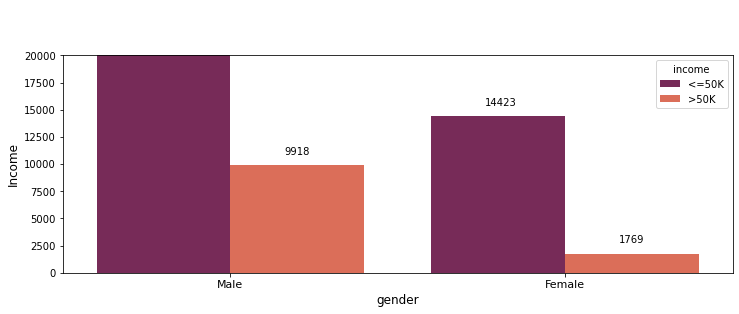

In [7]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = df, x = 'gender', hue="income", palette = 'rocket')

plt.xlabel("gender", fontsize= 12)
plt.ylabel("Income", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

There are more women than men in our dataset and, apparently, women have a higher income ratio compared to men.

### 2. Based on Education

C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


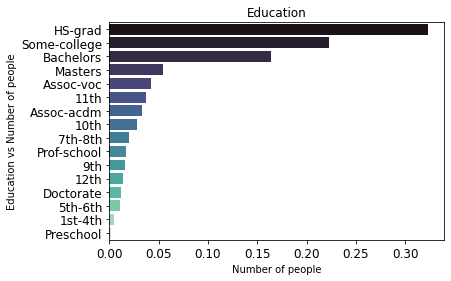

In [8]:
edu = df["education"].value_counts(normalize=True)

sns.barplot(edu.values, edu.index, palette='mako')
plt.title('Education')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

Here we see that the majority of people have completed HS-Grad, College or Bachelors

### 3.Based on Marital Status

In [9]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [10]:
status = df["marital-status"].value_counts(normalize=True)

sns.barplot(status.values, status.index, palette='viridis')
plt.title('marital-status')
plt.xlabel('Number of people')
plt.ylabel('Education vs Number of people')
plt.tick_params(labelsize=12)
plt.show()

C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


#### 4. Based on Age

In [11]:
plt.figure(figsize=(12,4))

sns.distplot(df['age'])
plt.ticklabel_format(style='scientific', axis='x') #repressing scientific notation on x
plt.ylabel('# of People')
plt.show()

C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The Average age is around 38-40 yrs

### 5. Based on Race

In [12]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data = df, x = 'race', hue="income", palette = 'cubehelix')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Income", fontsize= 12)


for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+1000))

### 6. Income With Respect to Education

In [13]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['education'],
              hue=df['income'], palette='Blues')
plt.title('Distribution of Income with respect to Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### 8. Income with respect to Marital Status

C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


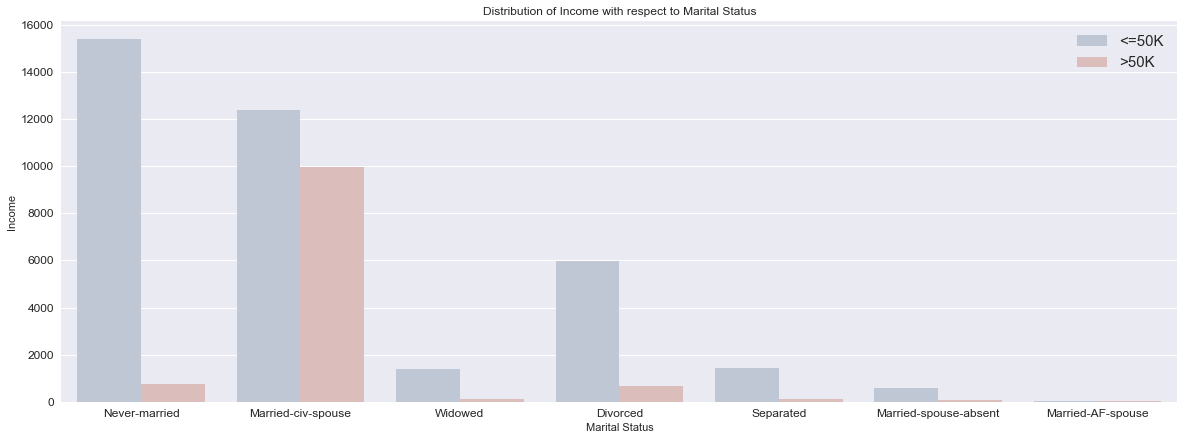

In [14]:
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['marital-status'],
              hue=df['income'], palette='vlag')
plt.title('Distribution of Income with respect to Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

#### 9. Average Hours per Week

C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


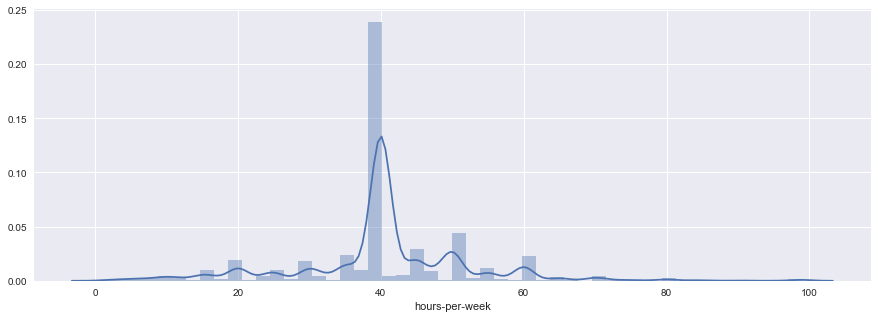

In [15]:
plt.figure(figsize=(15,5))

sns.distplot(df['hours-per-week'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

In [16]:
df["hours-per-week"].mean()

40.422382375824085

Seems that the average Hours per week put by an individual is 40

### 10. Occupation

C:\Users\Meet Patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


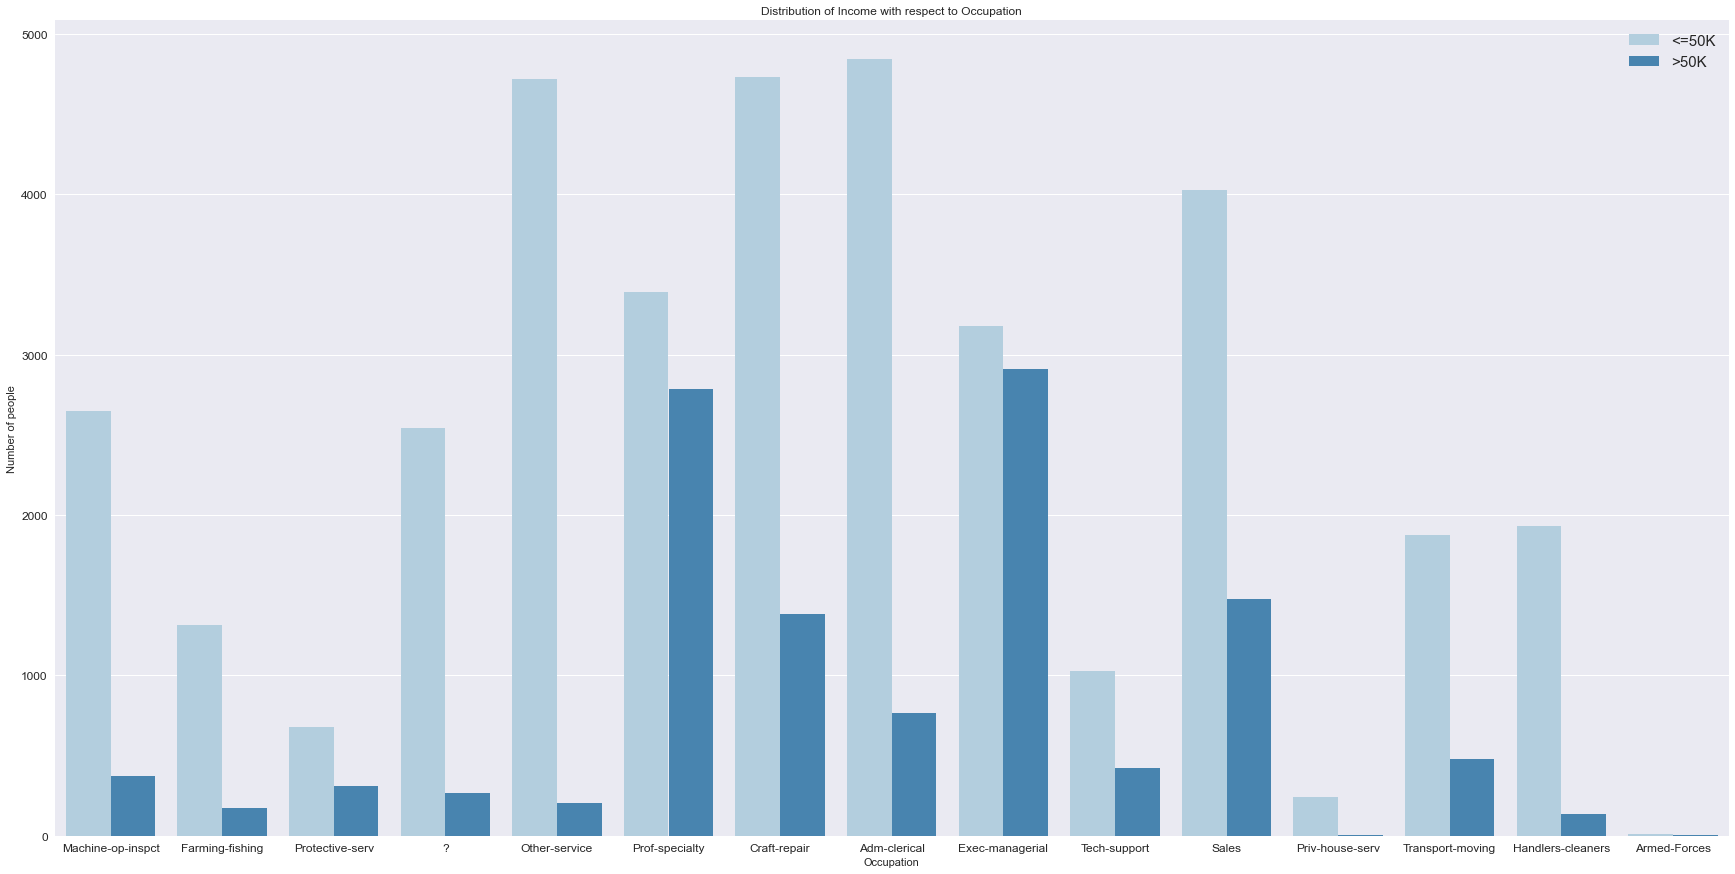

In [17]:
plt.style.use('seaborn')
plt.figure(figsize=(30, 15))
sns.countplot(df['occupation'],
              hue=df['income'], palette='Blues')
plt.title('Distribution of Income with respect to Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


In [18]:
df = df.replace('?', np.nan)

In [19]:
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [20]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [21]:
## Replacing the None values with mode 

df["workclass"] = df["workclass"].fillna(df["workclass"].mode())
df["occupation"] = df["occupation"].fillna(df["occupation"].mode())
df["native-country"] = df["native-country"].fillna(df["native-country"].mode())
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])

In [23]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int32
dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        
        df[col] = le.fit_transform(df[col].astype(str))

In [25]:
df.corr()

age  workclass    fnlwgt  education  educational-num  \
age              1.000000   0.051579 -0.076628  -0.015058         0.030940   
workclass        0.051579   1.000000 -0.022641  -0.011582        -0.052849   
fnlwgt          -0.076628  -0.022641  1.000000  -0.022570        -0.038761   
education       -0.015058  -0.011582 -0.022570   1.000000         0.359668   
educational-num  0.030940  -0.052849 -0.038761   0.359668         1.000000   
marital-status  -0.263978   0.045986  0.029851  -0.037417        -0.069992   
occupation       0.006784   0.316706 -0.003519  -0.038054         0.045126   
relationship    -0.263383   0.018185  0.009092  -0.010758        -0.090534   
race             0.028421   0.023833 -0.027062   0.013250         0.029239   
gender           0.088120  -0.000207  0.027739  -0.027041         0.009328   
capital-gain     0.077229   0.008116 -0.003706   0.028928         0.125146   
capital-loss     0.056944  -0.005973 -0.004366   0.017638         0.080972   
hours-per-week   0.071558  -0.095300 -0.013519   0.057659         0.143689   
native-country  -0.002529  -0.001114 -0.057955   0.074711         0.091798   
income           0.230369  -0.061446 -0.006339   0.080091         0.332613   

                 marital-status  occupation  relationship      race    gender  \
age                   -0.263978    0.006784     -0.263383  0.028421  0.088120   
workclass              0.045986    0.316706      0.018185  0.023833 -0.000207   
fnlwgt                 0.029851   -0.003519      0.009092 -0.027062  0.027739   
education             -0.037417   -0.038054     -0.010758  0.013250 -0.027041   
educational-num       -0.069992    0.045126     -0.090534  0.029239  0.009328   
marital-status         1.000000    0.050256      0.187800 -0.070104 -0.127479   
occupation             0.050256    1.000000     -0.010773 -0.009934  0.021866   
relationship           0.187800   -0.010773      1.000000 -0.117041 -0.579797   
race                  -0.070104   -0.009934     -0.117041  1.000000  0.086734   
gender                -0.127479    0.021866     -0.579797  0.086734  1.000000   
capital-gain          -0.043969    0.008157     -0.056510  0.011581  0.047094   
capital-loss          -0.033872    0.006845     -0.057201  0.018595  0.045480   
hours-per-week        -0.185567   -0.060462     -0.250400  0.039694  0.228560   
native-country        -0.017103    0.000309     -0.007113  0.112394 -0.001664   
income                -0.199072    0.007275     -0.253214  0.070934  0.214628   

                 capital-gain  capital-loss  hours-per-week  native-country  \
age                  0.077229      0.056944        0.071558       -0.002529   
workclass            0.008116     -0.005973       -0.095300       -0.001114   
fnlwgt              -0.003706     -0.004366       -0.013519       -0.057955   
education            0.028928      0.017638        0.057659        0.074711   
educational-num      0.125146      0.080972        0.143689        0.091798   
marital-status      -0.043969     -0.033872       -0.185567       -0.017103   
occupation           0.008157      0.006845       -0.060462        0.000309   
relationship        -0.056510     -0.057201       -0.250400       -0.007113   
race                 0.011581      0.018595        0.039694        0.112394   
gender               0.047094      0.045480        0.228560       -0.001664   
capital-gain         1.000000     -0.031441        0.082157        0.008670   
capital-loss        -0.031441      1.000000        0.054467        0.006654   
hours-per-week       0.082157      0.054467        1.000000        0.006896   
native-country       0.008670      0.006654        0.006896        1.000000   
income               0.223013      0.147554        0.227687        0.020640   

                   income  
age              0.230369  
workclass       -0.061446  
fnlwgt          -0.006339  
education        0.080091  
educational-num  0.332613  
marital-status  -0.199072  
occupation     

Here is it quite visible that education,fnlwgt,native.country,race, etc have minimum to no relation with the final output income of Income hence we will be dropping these

In [26]:
X = df.drop(["fnlwgt","education","marital-status","relationship","native-country"],axis=1)
X

age  workclass  educational-num  occupation  race  gender  \
0       25          3                7           6     2       1   
1       38          3                9           4     4       1   
2       28          1               12          10     4       1   
3       44          3               10           6     2       1   
4       18          8               10          14     4       0   
...    ...        ...              ...         ...   ...     ...   
48837   27          3               12          12     4       0   
48838   40          3                9           6     4       1   
48839   58          3                9           0     4       0   
48840   22          3                9           0     4       1   
48841   52          4                9           3     4       0   

       capital-gain  capital-loss  hours-per-week  income  
0                 0             0              40       0  
1                 0             0              50       0  
2                 0             0              40       1  
3              7688             0              40       1  
4                 0             0              30       0  
...             ...           ...             ...     ...  
48837             0             0              38       0  
48838             0             0              40       1  
48839             0             0              40       0  
48840             0             0              20       0  
48841         15024             0              40       1  

[48842 rows x 10 columns]

In [27]:
X = df.drop("income",axis=1)
y = df.income

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
y.value_counts(normalize=True)

0    0.760718
1    0.239282
Name: income, dtype: float64

In [30]:
# balancing the skewed data
from imblearn.over_sampling import RandomOverSampler 
rs = RandomOverSampler(random_state=30)

In [31]:
rs.fit(X,y)

RandomOverSampler(random_state=30)

In [32]:
X_new,y_new = rs.fit_resample(X, y)
y_new.value_counts(normalize=True)

0    0.5
1    0.5
Name: income, dtype: float64

In [33]:
df.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          3  226802          1                7               4   
1   38          3   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          3  160323         15               10               2   
4   18          8  103497         15               10               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
4          14             3     4       0             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38       0  
2              40              38       1  
3              40              38       1  
4              30              38       0

## Models 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=30)

In [36]:
X_train.dtypes

age                int64
workclass          int32
fnlwgt             int64
education          int32
educational-num    int64
marital-status     int32
occupation         int32
relationship       int32
race               int32
gender             int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
dtype: object

In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (52017, 14)
X_test shape: (22293, 14)
y_train shape: (52017,)
y_test shape: (22293,)


In [38]:
lr = LogisticRegression(solver = "liblinear")
gn = GaussianNB()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()

In [39]:
#LogisticRegression
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)


#RandomForestClassifier
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

#DecisionTreeClassifier
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)



# Evaluation of Models

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

In [41]:
print("Logistic Regression:")
print("Accuracy score:", round(accuracy_score(y_test, y_pred_lr) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_lr) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_lr) * 100,3))

Logistic Regression:
Accuracy score: 74.862
F1 Score:  74.899
MSE:  25.138


In [42]:
print("RandomForestClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_rf) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_rf) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_rf) * 100,3))

RandomForestClassifier:
Accuracy score: 92.576
F1 Score:  92.797
MSE:  7.424


In [43]:
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(y_test, y_pred_dt) * 100, 3))
print("F1 Score: ", round(f1_score(y_test,y_pred_dt) * 100,3))
print("MSE: ", round(mean_squared_error(y_test,y_pred_dt) * 100,3))

DecisionTreeClassifier:
Accuracy score: 90.701
F1 Score:  91.096
MSE:  9.299
